In [37]:
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('../data/telco-customer-churn.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


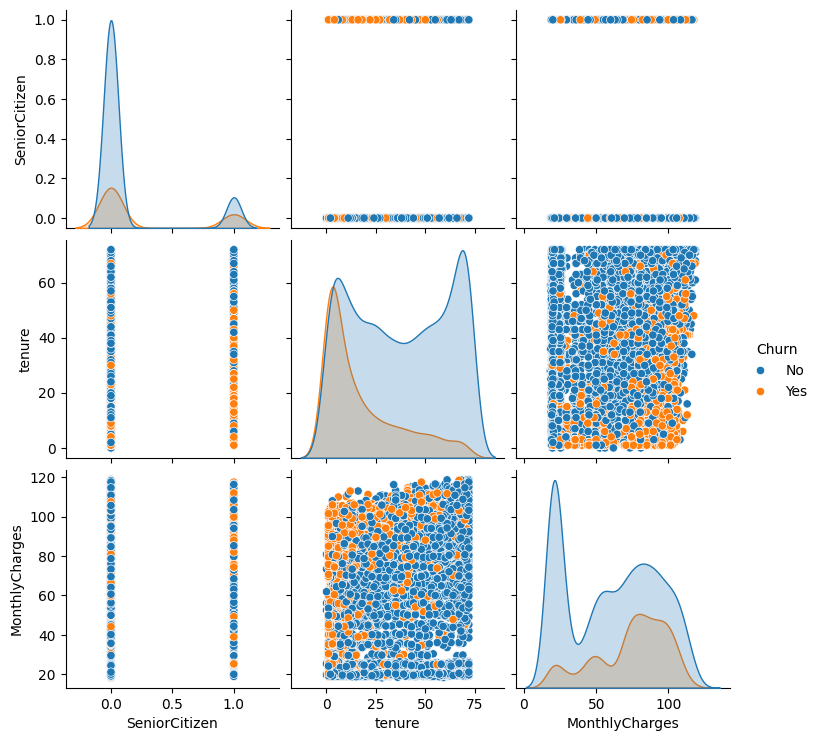

In [52]:
sns.pairplot(data, hue ="Churn")

In [61]:
data['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})

0       2
1       0
2       0
3       2
4       0
       ..
7038    1
7039    1
7040    2
7041    1
7042    0
Name: MultipleLines, Length: 7043, dtype: int64

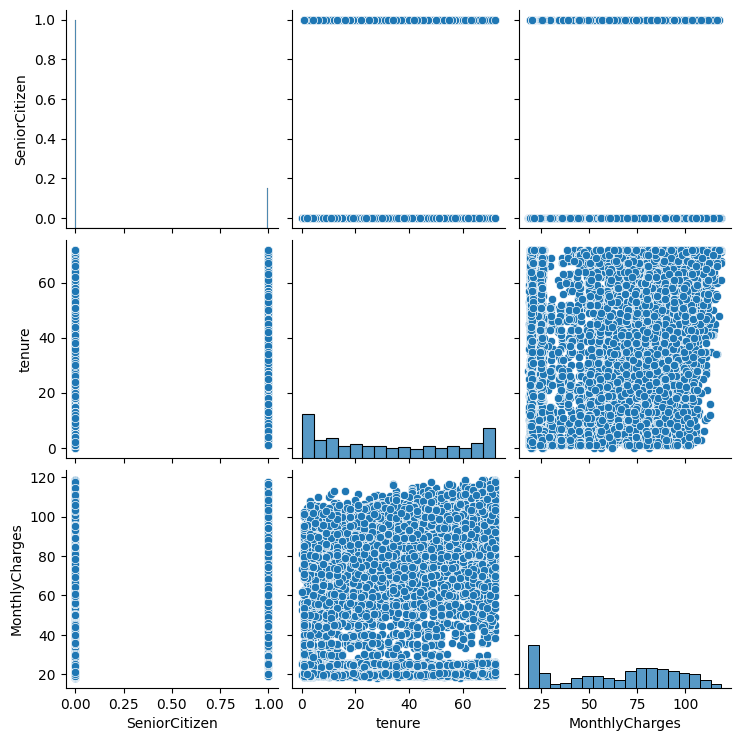

In [62]:
numeric_cols = data.select_dtypes(include=['number']).columns
sns.pairplot(data[numeric_cols])

In [63]:
data['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [39]:
# Check if senior customers are more likely to churn
customers_churn = data[data['Churn'] == 'Yes']
non_senior_customers_churn = customers_churn[customers_churn['SeniorCitizen'] == 0]

print(f'Customers churn: {len(customers_churn)}')
print(f'Non Senior customers churn: {len(non_senior_customers_churn)}')

Customers churn: 1869
Non Senior customers churn: 1393


In [40]:
# Check for gender 
male_churn = customers_churn[customers_churn['gender'] == 'Male']
female_churn = customers_churn[customers_churn['gender'] == 'Female']

print(f'Male churn: {len(male_churn)}')
print(f'Female churn: {len(female_churn)}')

Male churn: 930
Female churn: 939


In [41]:
# Check if partners plays a role
with_partner_churn = customers_churn[customers_churn['Partner'] == 'Yes']

print(f'With partner: {len(with_partner_churn)}')
print(f'Without partner: {len(customers_churn) - len(with_partner_churn)}')

With partner: 669
Without partner: 1200


In [42]:
# If with multiple lines
with_mulitple_lines = customers_churn[customers_churn['MultipleLines'] == 'Yes']

print(f'With multiple lines: {len(with_mulitple_lines)}')
print(f'Without multiple lines: {len(customers_churn) - len(with_mulitple_lines)}')

With multiple lines: 850
Without multiple lines: 1019


In [43]:
# Paperless customers
paperless_customers = customers_churn[customers_churn['PaperlessBilling'] == 'Yes']

print(f'Paperless customers: {len(paperless_customers)}')
print(f'Non paperless customers: {len(customers_churn) - len(paperless_customers)}')

Paperless customers: 1400
Non paperless customers: 469


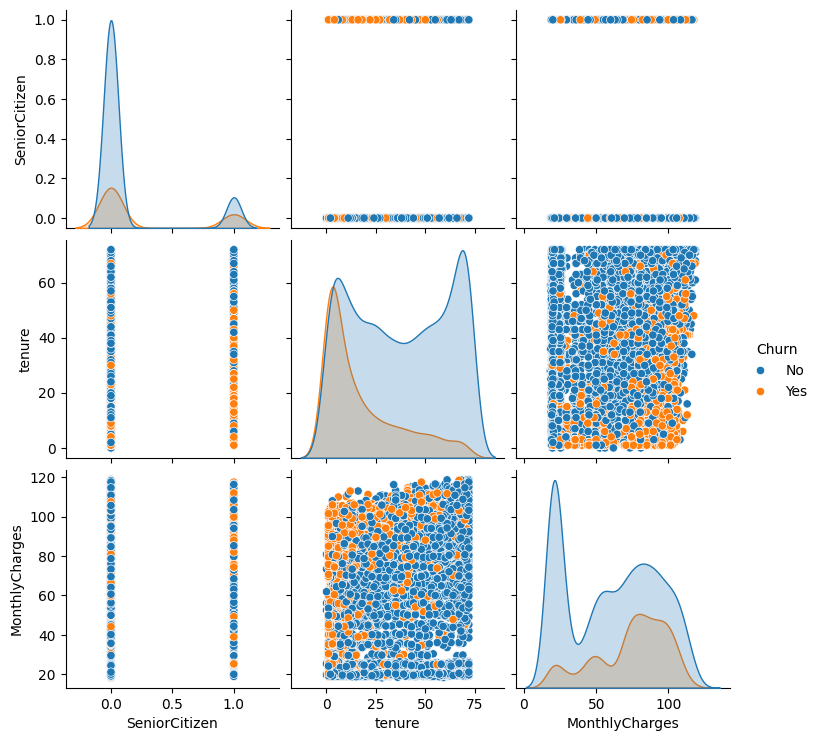

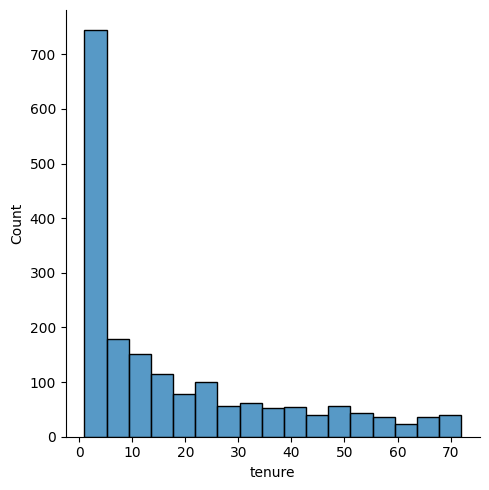

In [45]:
sns.displot(data=customers_churn, x="tenure")